<a href="https://colab.research.google.com/github/Ch-Praneeth1/Spam_and_Ham_Classification_Using_ML/blob/main/Spam_and_Ham_detection_using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM AND HAM CLASSIFICATION USING MACHINE LEARNING


## Importing the required


1.   Pandas for reading csv file and working on it
2.   `train_test_split` for splitting the data into training and testing sets
3.   `TfidfVectorizer` for transforming text data into feature vectors
4.   `LogisticRegression` for classification of **SPAM** and **HAM**
5.   `accuracy_score` for computing the accuracy of the model
6.   `matplotlib.pyplot` to Visualize the data




In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Reading the `mail_data.csv` dataset

In [41]:
df = pd.read_csv('mail_data.csv')
df.head()
# df.info()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Pre-Processing
Replacing null data with null string if any null value is present



In [42]:
data = df.where((pd.notnull(df)), '')

In [43]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Becoming one with data

1.  knowing more about the data helps us to make a better model
2.  Knowing the shape also helps us

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
data.shape

(5572, 2)

## Label Encoding

As machine learning algorithms works very good with numbers we have to change the spam and ham into 0,1 respectively

1. **Spam** is changed to **0**
2. **Ham** is changed to **1**


In [46]:
data.loc[data['Category'] == 'spam', 'Category',]  =  0    # 0 specifies spam
data.loc[data['Category'] == 'ham', 'Category',] = 1       # 1 specifies ham

In [47]:
data.head(100)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,0,Your free ringtone is waiting to be collected....
96,1,Watching telugu movie..wat abt u?
97,1,i see. When we finish we have loads of loans t...
98,1,Hi. Wk been ok - on hols now! Yes on for a bit...


## Seperating data as texts and labels

1. Messages in X
2. Category in Y

In [48]:
X = data['Message']
Y = data['Category']

In [49]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [50]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

## Visualize the data

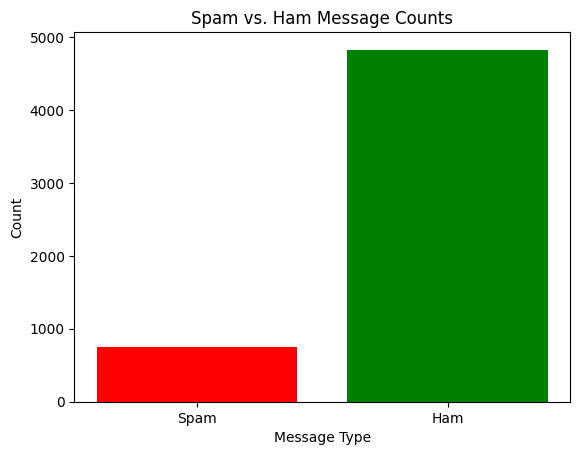

In [51]:
spam_count = 0
ham_count = 0
for i in Y:
  if i==0:
    spam_count+=1
  else:
    ham_count+=1

Categories = ['Spam', 'Ham']
counts = [spam_count, ham_count]
plt.bar(Categories, counts, color=['red', 'green'])
plt.xlabel('Mail Type')
plt.ylabel('Count')
plt.title('Spam vs. Ham Message Counts')
plt.show()

## Splitting the data into `Train` and `Test` sets



In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [53]:
# shapes of the train data
print(X_train.shape)
print(Y_train.shape)

(4457,)
(4457,)


In [54]:
# shapes of test data
print(X_test.shape)
print(Y_test.shape)

(1115,)
(1115,)


## Transfroming text data into feature vectors

`TfidfVectorizer` helps to achive this task.


In [55]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [56]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [57]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

## Creating a model for mail classification


In [58]:
model = LogisticRegression()

## Training the model

1. Train the model with `X_train_features`
2. compute the accuracy for training dataset


In [59]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [60]:
prediction_on_training_dataset = model.predict(X_train_features)
train_accuracy = accuracy_score(Y_train,prediction_on_training_dataset)

print('training accuracy :',train_accuracy)

training accuracy : 0.9670181736594121


## Testing the model

1. Test the model with `X_test_features`
2. compute the accuracy for testing dataset

In [61]:
prediction_on_testing_dataset = model.predict(X_test_features)
test_accuracy = accuracy_score(Y_test,prediction_on_testing_dataset)

print('testing accuracy :',test_accuracy)

testing accuracy : 0.9659192825112107


## An Predction system


In [62]:
def prediction_model(input_mail,feature_extraction,model):
  input_mail_features = feature_extraction.transform(input_mail)

  predction = model.predict(input_mail_features)
  print(predction)

  if predction[0] == 0:
    print("The given input mail is a spam mail, BE CAREFULL!!")
  else:
    print("The given input mail is a ham mail, SAFE!!")


In [63]:
mail_txt = input("Input your mail that you need to know weather it a SPAM or HAM mail")
input_mail = []
input_mail.append(mail_txt)
prediction_model(input_mail,feature_extraction,model)

Input your mail that you need to know weather it a SPAM or HAM mailI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. 
[1]
The given input mail is a ham mail, SAFE!!


## Sample input text

1. I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.  **(ham)**
2. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030    **(spam)**
3. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's **(spam)**
4. Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ? **(ham)**